In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv('mod.csv')

In [3]:
def parse_timestamps(timestamp_str):
    if pd.isna(timestamp_str):
        return None  
    try:
        #our format: "[datetime.datetime(2024,6,23,14,30,45,678)]"
        timestamp_str = timestamp_str.strip('[]')  
        parts = timestamp_str.split(',')  
        y = int(parts[0].split('(')[-1])  
        m = int(parts[1])                 
        d = int(parts[2])                 
        h = int(parts[3])                 
        mi = int(parts[4])               
        s = int(parts[5])                 
        ms = int(parts[6].strip(')'))   
        return datetime(y, m, d, h, mi, s, ms)
    except Exception as e:
        print(f"Error parsing timestamps: {e}")
        return None  

In [4]:
df['timestamps'] = df['timestamps'].apply(parse_timestamps)

In [5]:
print("Sample rows after parsing timestamps:")
print(df.head(3))

Sample rows after parsing timestamps:
   id                            name  \
0   1      Men Solid Oversized Cotton   
1   2  Men Cotton Pure Cotton T-shirt   
2   3       Women Pure Cotton T-shirt   

                                                 img asin  price     mrp  \
0  https://assets.myntassets.com/f_webp,dpr_1.0,q...    -  532.0  1299.0   
1  https://assets.myntassets.com/f_webp,dpr_1.0,q...    -  274.0   499.0   
2  https://assets.myntassets.com/f_webp,dpr_1.0,q...    -  551.0  1199.0   

   rating  ratingTotal  discount                 seller  \
0     4.1         5300        59  Difference of Opinion   
1     4.2        25400        45               Roadster   
2     4.5         3400        54              DILLINGER   

                                                purl  \
0  https://www.myntra.com/tshirts/difference-of-o...   
1  https://www.myntra.com/tshirts/roadster/roadst...   
2  https://www.myntra.com/tshirts/dillinger/dilli...   

                  timestamps  

In [6]:
df = df.dropna(subset=['timestamps'])
df_exploded = df.explode('timestamps')

# Print first 3 rows of exploded DataFrame
print("First few rows of exploded DataFrame:")
print(df_exploded.head(3))

First few rows of exploded DataFrame:
   id                            name  \
0   1      Men Solid Oversized Cotton   
1   2  Men Cotton Pure Cotton T-shirt   
2   3       Women Pure Cotton T-shirt   

                                                 img asin  price     mrp  \
0  https://assets.myntassets.com/f_webp,dpr_1.0,q...    -  532.0  1299.0   
1  https://assets.myntassets.com/f_webp,dpr_1.0,q...    -  274.0   499.0   
2  https://assets.myntassets.com/f_webp,dpr_1.0,q...    -  551.0  1199.0   

   rating  ratingTotal  discount                 seller  \
0     4.1         5300        59  Difference of Opinion   
1     4.2        25400        45               Roadster   
2     4.5         3400        54              DILLINGER   

                                                purl  \
0  https://www.myntra.com/tshirts/difference-of-o...   
1  https://www.myntra.com/tshirts/roadster/roadst...   
2  https://www.myntra.com/tshirts/dillinger/dilli...   

                  timestamps  

In [7]:
df_exploded['date'] = df_exploded['timestamps'].apply(lambda x: x.date() if isinstance(x, datetime) else None)

In [8]:
df_exploded['weighted_score'] = df_exploded['rating'] * df_exploded['ratingTotal']

df_exploded['purchase_weighted_score'] = df_exploded['weighted_score'] / df_exploded.groupby('id')['timestamps'].transform('count')

product_trend = df_exploded.groupby('name')['purchase_weighted_score'].sum()

In [9]:
# Print the top 20 trend products
top_20_trending_products = product_trend.nlargest(20)
print("Top 20 Trending Products:")
print(top_20_trending_products)

Top 20 Trending Products:
name
Unisex Skin Care Gift Set                 2962160.0
Sustainable Skin & Hair Care              1698340.0
Men Slim Fit Jeans                        1582145.8
Printed Round Neck Pure Cotton T-shirt    1562420.8
Printed Cotton Pure Cotton T-shirt        1525633.9
Bio Complete Skin Care Kit                1502600.0
Set of 3 Skin Care Gift Set               1370160.0
Solid Round Neck T-shirt                  1205855.8
Women Analogue Watch                      1163486.7
Men Skinny Fit Jeans                      1140993.9
Printed Round Neck T-shirt                1116853.6
Sustainable Skin Care Gift Set            1060400.0
Cleanser Toner Moisturizer Set             865040.0
Set Of Toner & Cream                       847000.0
Bio Suncare Kit - 290ml                    832480.0
Solid Round Neck Pure Cotton T-shirt       803058.1
Printed Pure Cotton T-shirt                795172.4
Skincare Daily Routine Combo               776160.0
Pack Of 2 Printed T-shirts       

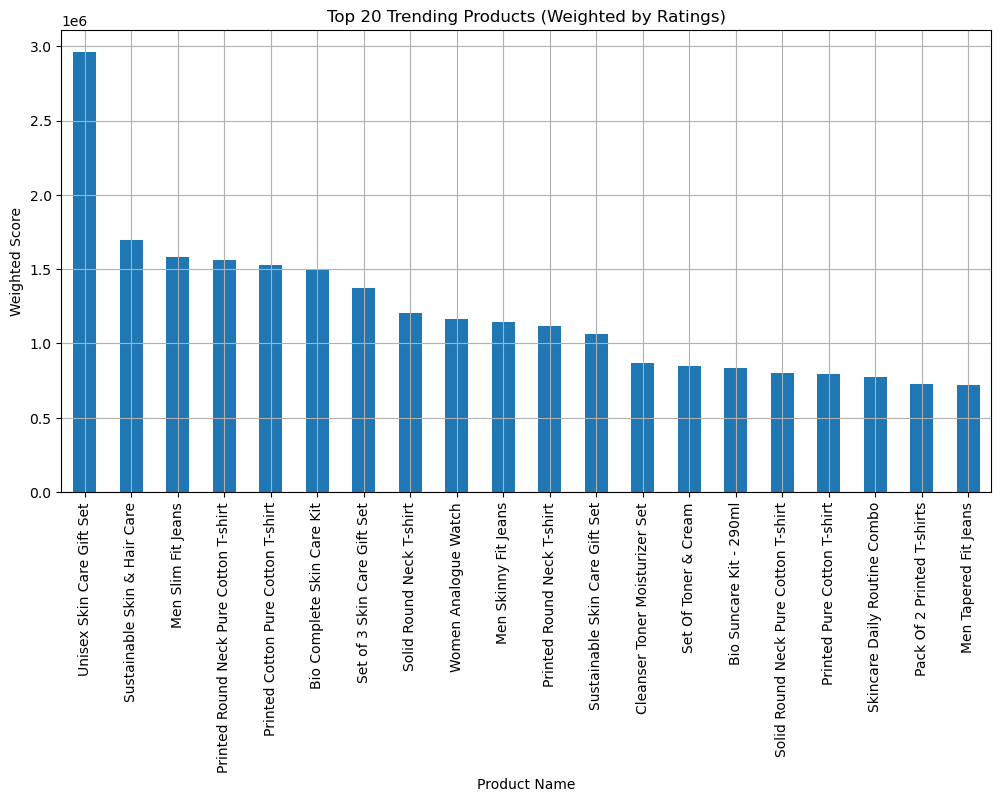

In [10]:
if top_20_trending_products.empty:
    print("No data found for plotting.")
else:
    # Plot the trend for top 20 products
    plt.figure(figsize=(12, 6))
    top_20_trending_products.plot(kind='bar')
    plt.title('Top 20 Trending Products (Weighted by Ratings)')
    plt.xlabel('Product Name')
    plt.ylabel('Weighted Score')
    plt.grid(True)
    plt.show()